# Section C (Algorithm implementation using packages)

In [ ]:
#@title Import libraries
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#@title Reading Data
data = pd.read_csv('/content/Thyroid_data.csv')

In [ ]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,0,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,0,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,0,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,0,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,0,SVI,negative


In [ ]:
data.shape

(2800, 30)

In [ ]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
label                        0
dtype: int64

In [ ]:
count1 = (data['sex'] == '0').sum()
print(count1)

110


replacing the null values in sex to the most common sex

In [ ]:
most_common_sex = data['sex'].mode()[0]
# print(most_common_sex)
#i.e. = F
data['sex'] = data['sex'].replace('0', most_common_sex)

In [ ]:
count2 = (data['sex'] == '0').sum()
print(count2)

0


In [ ]:
print(data.dtypes)

age                            int64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
TBG measured                  object
T

In [ ]:
for cols in data.columns:
  print(f'{cols}: {data[cols].unique()}')
  print()


age: [ 41  23  46  70  18  59  80  66  68  84  67  71  28  65  42  63  51  81
  54  55  60  25  73  34  78  37  85  26  58  64  44  48  61  35  83  21
  87  53  77  27  69  74  38  76  45  36  22  43  72  82  31  39  49  62
  57   1  50  30  29  75  19   7  79  17  24  15  32  47  16  52  33  13
  10  89  56  20  90  40  88  14  86  94  12   4  11   8   5 455   2  91
   6   0  93  92]

sex: ['F' 'M']

on thyroxine: ['f' 't']

query on thyroxine: ['f' 't']

on antithyroid medication: ['f' 't']

sick: ['f' 't']

pregnant: ['f' 't']

thyroid surgery: ['f' 't']

I131 treatment: ['f' 't']

query hypothyroid: ['f' 't']

query hyperthyroid: ['f' 't']

lithium: ['f' 't']

goitre: ['f' 't']

tumor: ['f' 't']

hypopituitary: ['f' 't']

psych: ['f' 't']

TSH measured: ['t' 'f']

TSH: [1.30e+00 4.10e+00 9.80e-01 1.60e-01 7.20e-01 3.00e-02 0.00e+00 2.20e+00
 6.00e-01 2.40e+00 1.10e+00 2.80e+00 3.30e+00 1.20e+01 1.20e+00 1.50e+00
 6.00e+00 2.10e+00 1.00e-01 8.00e-01 1.90e+00 3.10e+00 2.00e-01 1.30e+

In [ ]:
len(data['label'])

2800

In [ ]:
count1 = (data['label'] == 'negative').sum()
count2 = (data['label'] == 'hyperthyroid').sum()
count3 = (data['label'] == 'goitre').sum()
count4 = (data['label'] == 'T3 toxic').sum()
print("count of negative: ", count1)
print("count of hyperthyroid: ", count2)
print("count of goitre: ", count3)
print("count of T3 toxic: ", count4)


count of negative:  2723
count of hyperthyroid:  62
count of goitre:  7
count of T3 toxic:  8


In [ ]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.0
mean,51.825714,4.198261,1.601893,101.904786,0.892062,99.115679,0.0
std,20.480953,20.381055,1.102638,43.599948,0.358101,46.094566,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,36.000000,0.200000,0.800000,84.000000,0.830000,86.750000,0.0
50%,54.000000,1.200000,1.800000,102.000000,0.955000,104.000000,0.0
75%,67.000000,2.400000,2.300000,123.000000,1.070000,122.000000,0.0
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000,0.0


In [ ]:
#@title Dropping redundant columns
new_data = data.drop(['TBG', 'TBG measured', 'referral source', 'age'], axis = 1)
# Since both of the data points are constant and are of no use in the model.

In [ ]:
new_data.nunique()

age                           94
sex                            2
on thyroxine                   2
query on thyroxine             2
on antithyroid medication      2
sick                           2
pregnant                       2
thyroid surgery                2
I131 treatment                 2
query hypothyroid              2
query hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH measured                   2
TSH                          264
T3 measured                    2
T3                            65
TT4 measured                   2
TT4                          218
T4U measured                   2
T4U                          139
FTI measured                   2
FTI                          210
label                          4
dtype: int64

In [ ]:
#@title Label encoding the categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in new_data.columns:
    if new_data[col].nunique() == 2:  # Check if there are exactly 2 unique values
        new_data[col] = le.fit_transform(new_data[col])


In [ ]:
new_data.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,label
0,41,0,0,0,0,0,0,0,0,0,...,1.30,1,2.5,1,125.0,1,1.14,1,109.0,negative
1,23,0,0,0,0,0,0,0,0,0,...,4.10,1,2.0,1,102.0,0,0.00,0,0.0,negative
2,46,1,0,0,0,0,0,0,0,0,...,0.98,0,0.0,1,109.0,1,0.91,1,120.0,negative
3,70,0,1,0,0,0,0,0,0,0,...,0.16,1,1.9,1,175.0,0,0.00,0,0.0,negative
4,70,0,0,0,0,0,0,0,0,0,...,0.72,1,1.2,1,61.0,1,0.87,1,70.0,negative
5,18,0,1,0,0,0,0,0,0,0,...,0.03,0,0.0,1,183.0,1,1.30,1,141.0,negative
6,59,0,0,0,0,0,0,0,0,0,...,0.00,0,0.0,1,72.0,1,0.92,1,78.0,negative
7,80,0,0,0,0,0,0,0,0,0,...,2.20,1,0.6,1,80.0,1,0.70,1,115.0,negative
8,66,0,0,0,0,0,0,0,0,0,...,0.60,1,2.2,1,123.0,1,0.93,1,132.0,negative
9,68,1,0,0,0,0,0,0,0,0,...,2.40,1,1.6,1,83.0,1,0.89,1,93.0,negative


In [ ]:
#@title Normalising the data using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in new_data.columns:
    if new_data[col].nunique() > 2 and new_data[col].dtype == 'float64':
        new_data[col] = scaler.fit_transform(new_data[col].values.reshape(-1, 1))

In [ ]:
new_data.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,label
0,41,0,0,0,0,0,0,0,0,0,...,-0.142229,1,0.814653,1,0.529802,1,0.692492,1,0.214474,negative
1,23,0,0,0,0,0,0,0,0,0,...,-0.004822,1,0.361114,1,0.002184,0,-2.491534,0,-2.150652,negative
2,46,1,0,0,0,0,0,0,0,0,...,-0.157933,0,-1.453041,1,0.162764,1,0.050101,1,0.453156,negative
3,70,0,1,0,0,0,0,0,0,0,...,-0.198173,1,0.270406,1,1.676797,0,-2.491534,0,-2.150652,negative
4,70,0,0,0,0,0,0,0,0,0,...,-0.170692,1,-0.364548,1,-0.938352,1,-0.061620,1,-0.631764,negative
5,18,0,1,0,0,0,0,0,0,0,...,-0.204553,0,-1.453041,1,1.860316,1,1.139372,1,0.908823,negative
6,59,0,0,0,0,0,0,0,0,0,...,-0.206025,0,-1.453041,1,-0.686013,1,0.078031,1,-0.458177,negative
7,80,0,0,0,0,0,0,0,0,0,...,-0.098063,1,-0.908795,1,-0.502494,1,-0.536431,1,0.344664,negative
8,66,0,0,0,0,0,0,0,0,0,...,-0.176581,1,0.542530,1,0.483922,1,0.105961,1,0.713537,negative
9,68,1,0,0,0,0,0,0,0,0,...,-0.088248,1,-0.001717,1,-0.433674,1,-0.005760,1,-0.132700,negative


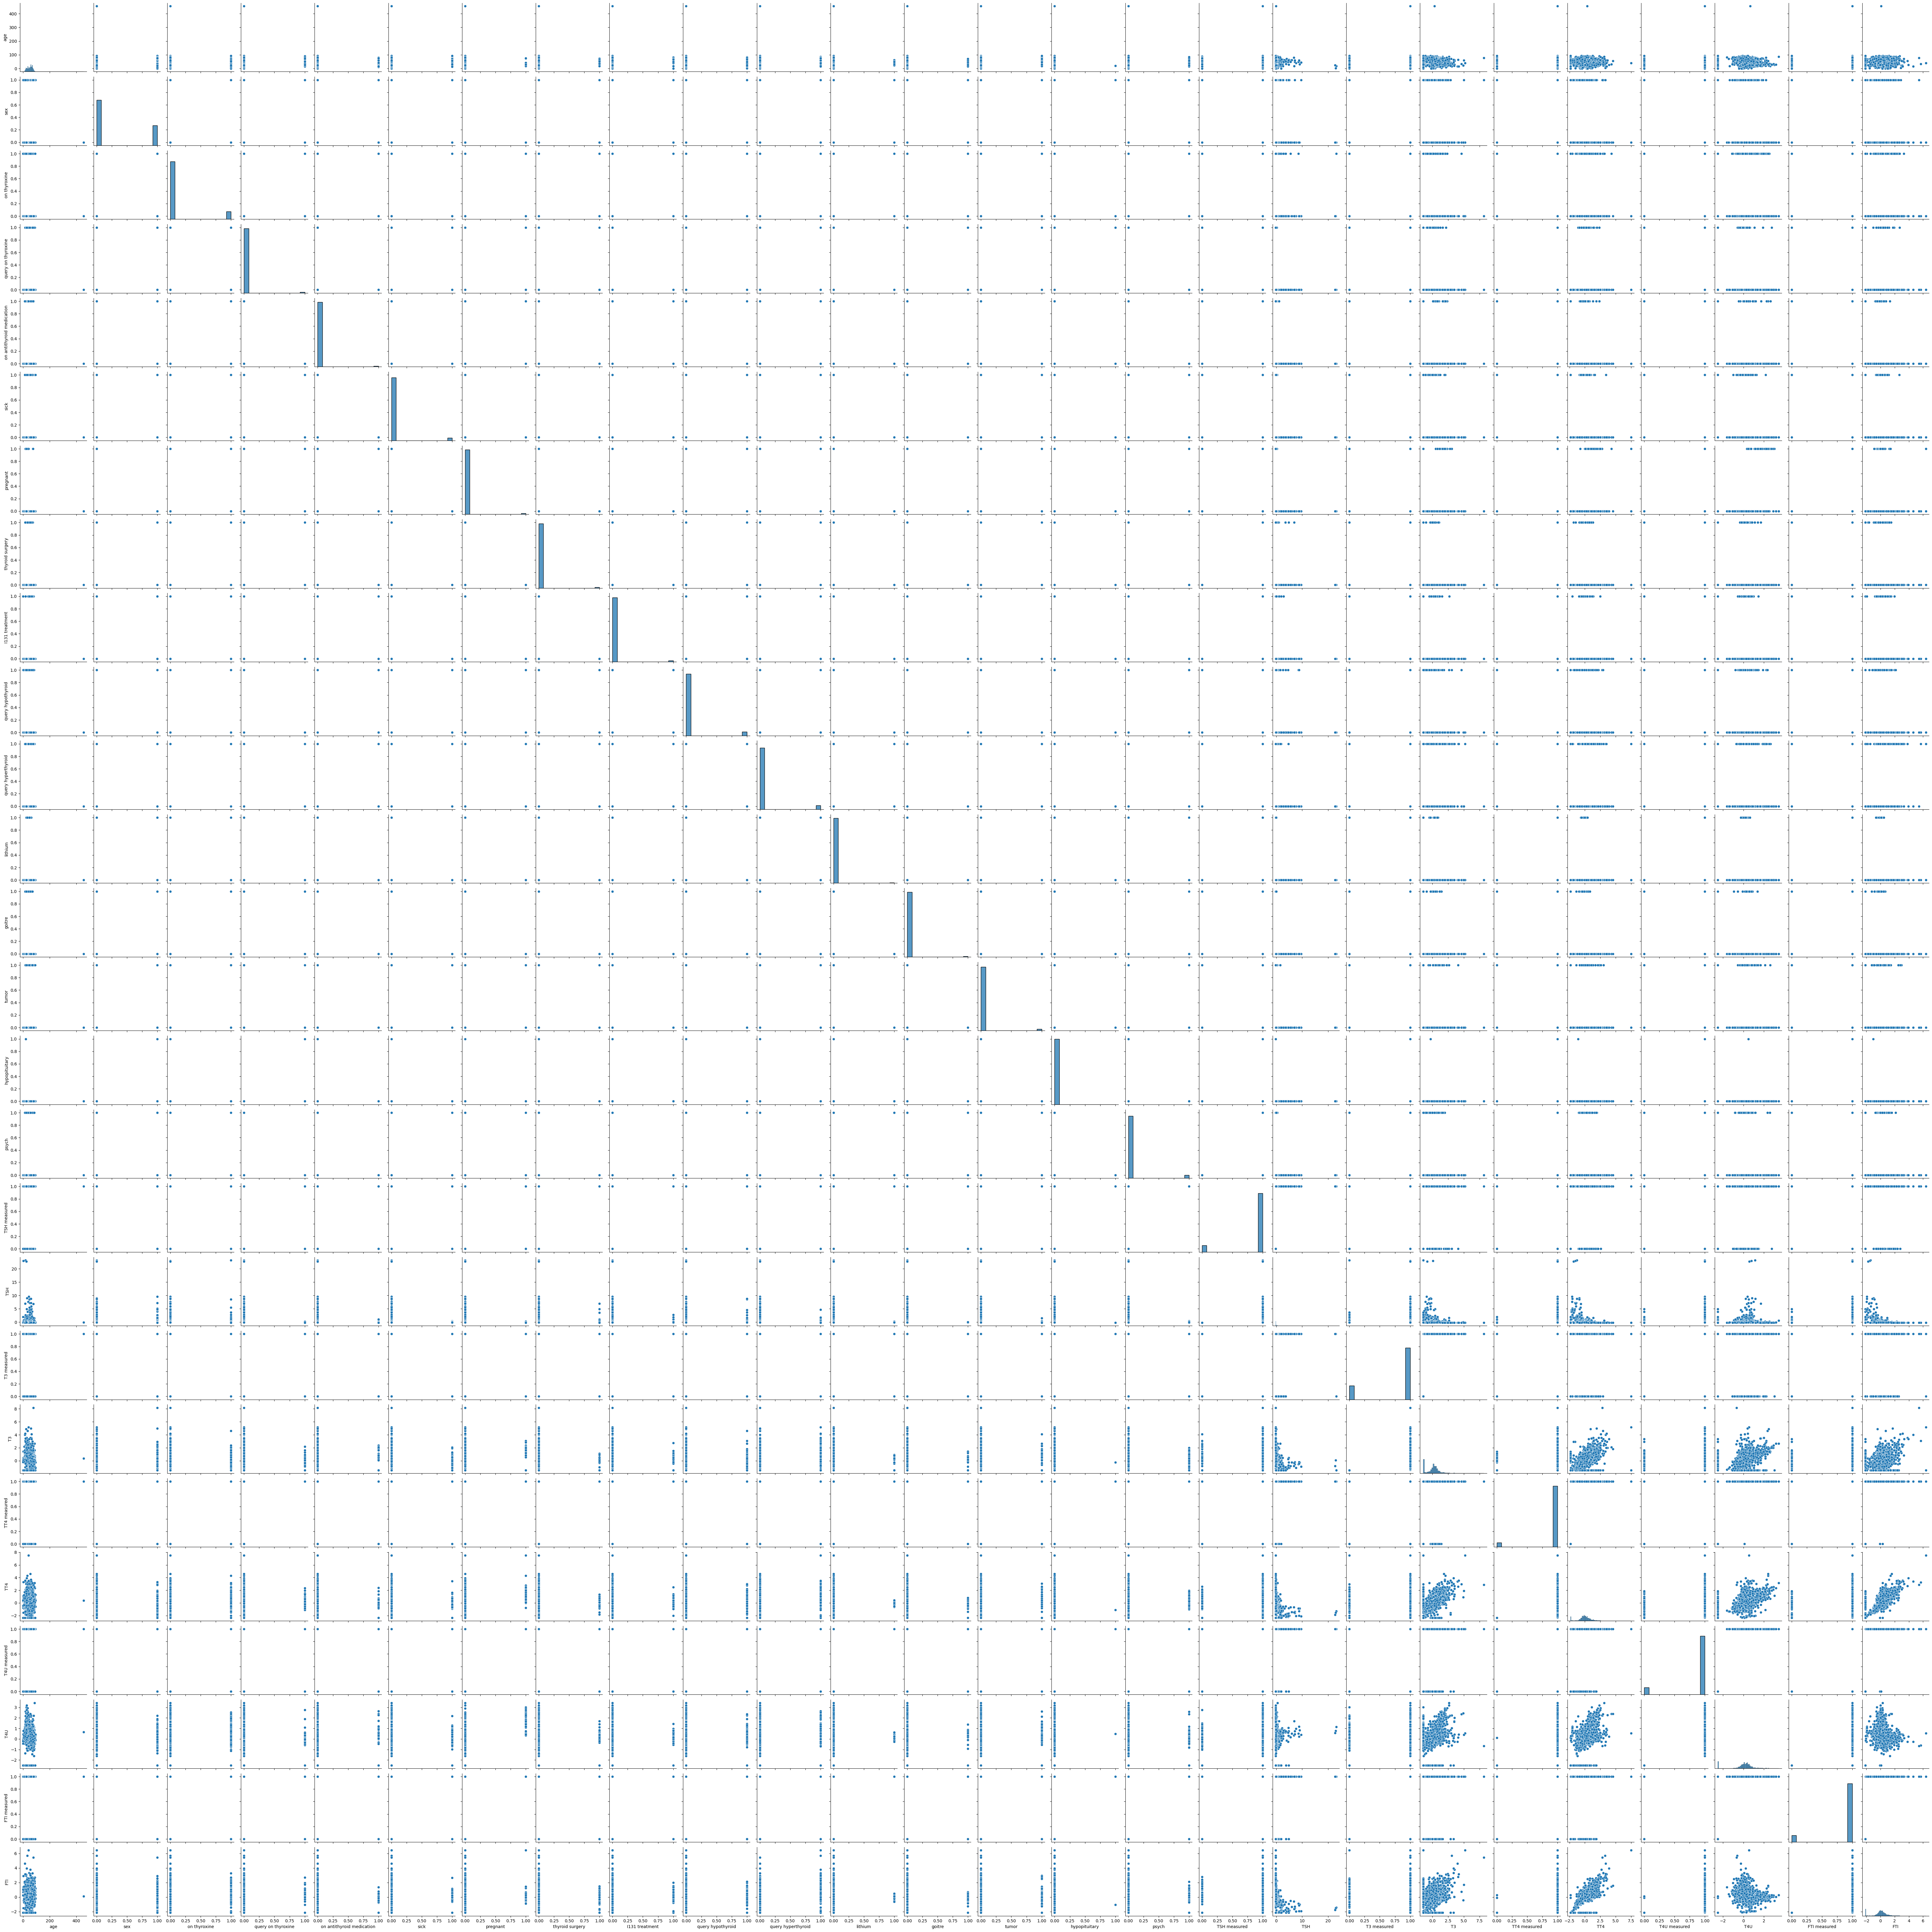

In [ ]:
import seaborn as sns

sns.pairplot(new_data)

In [ ]:
new_data.shape

(2800, 27)

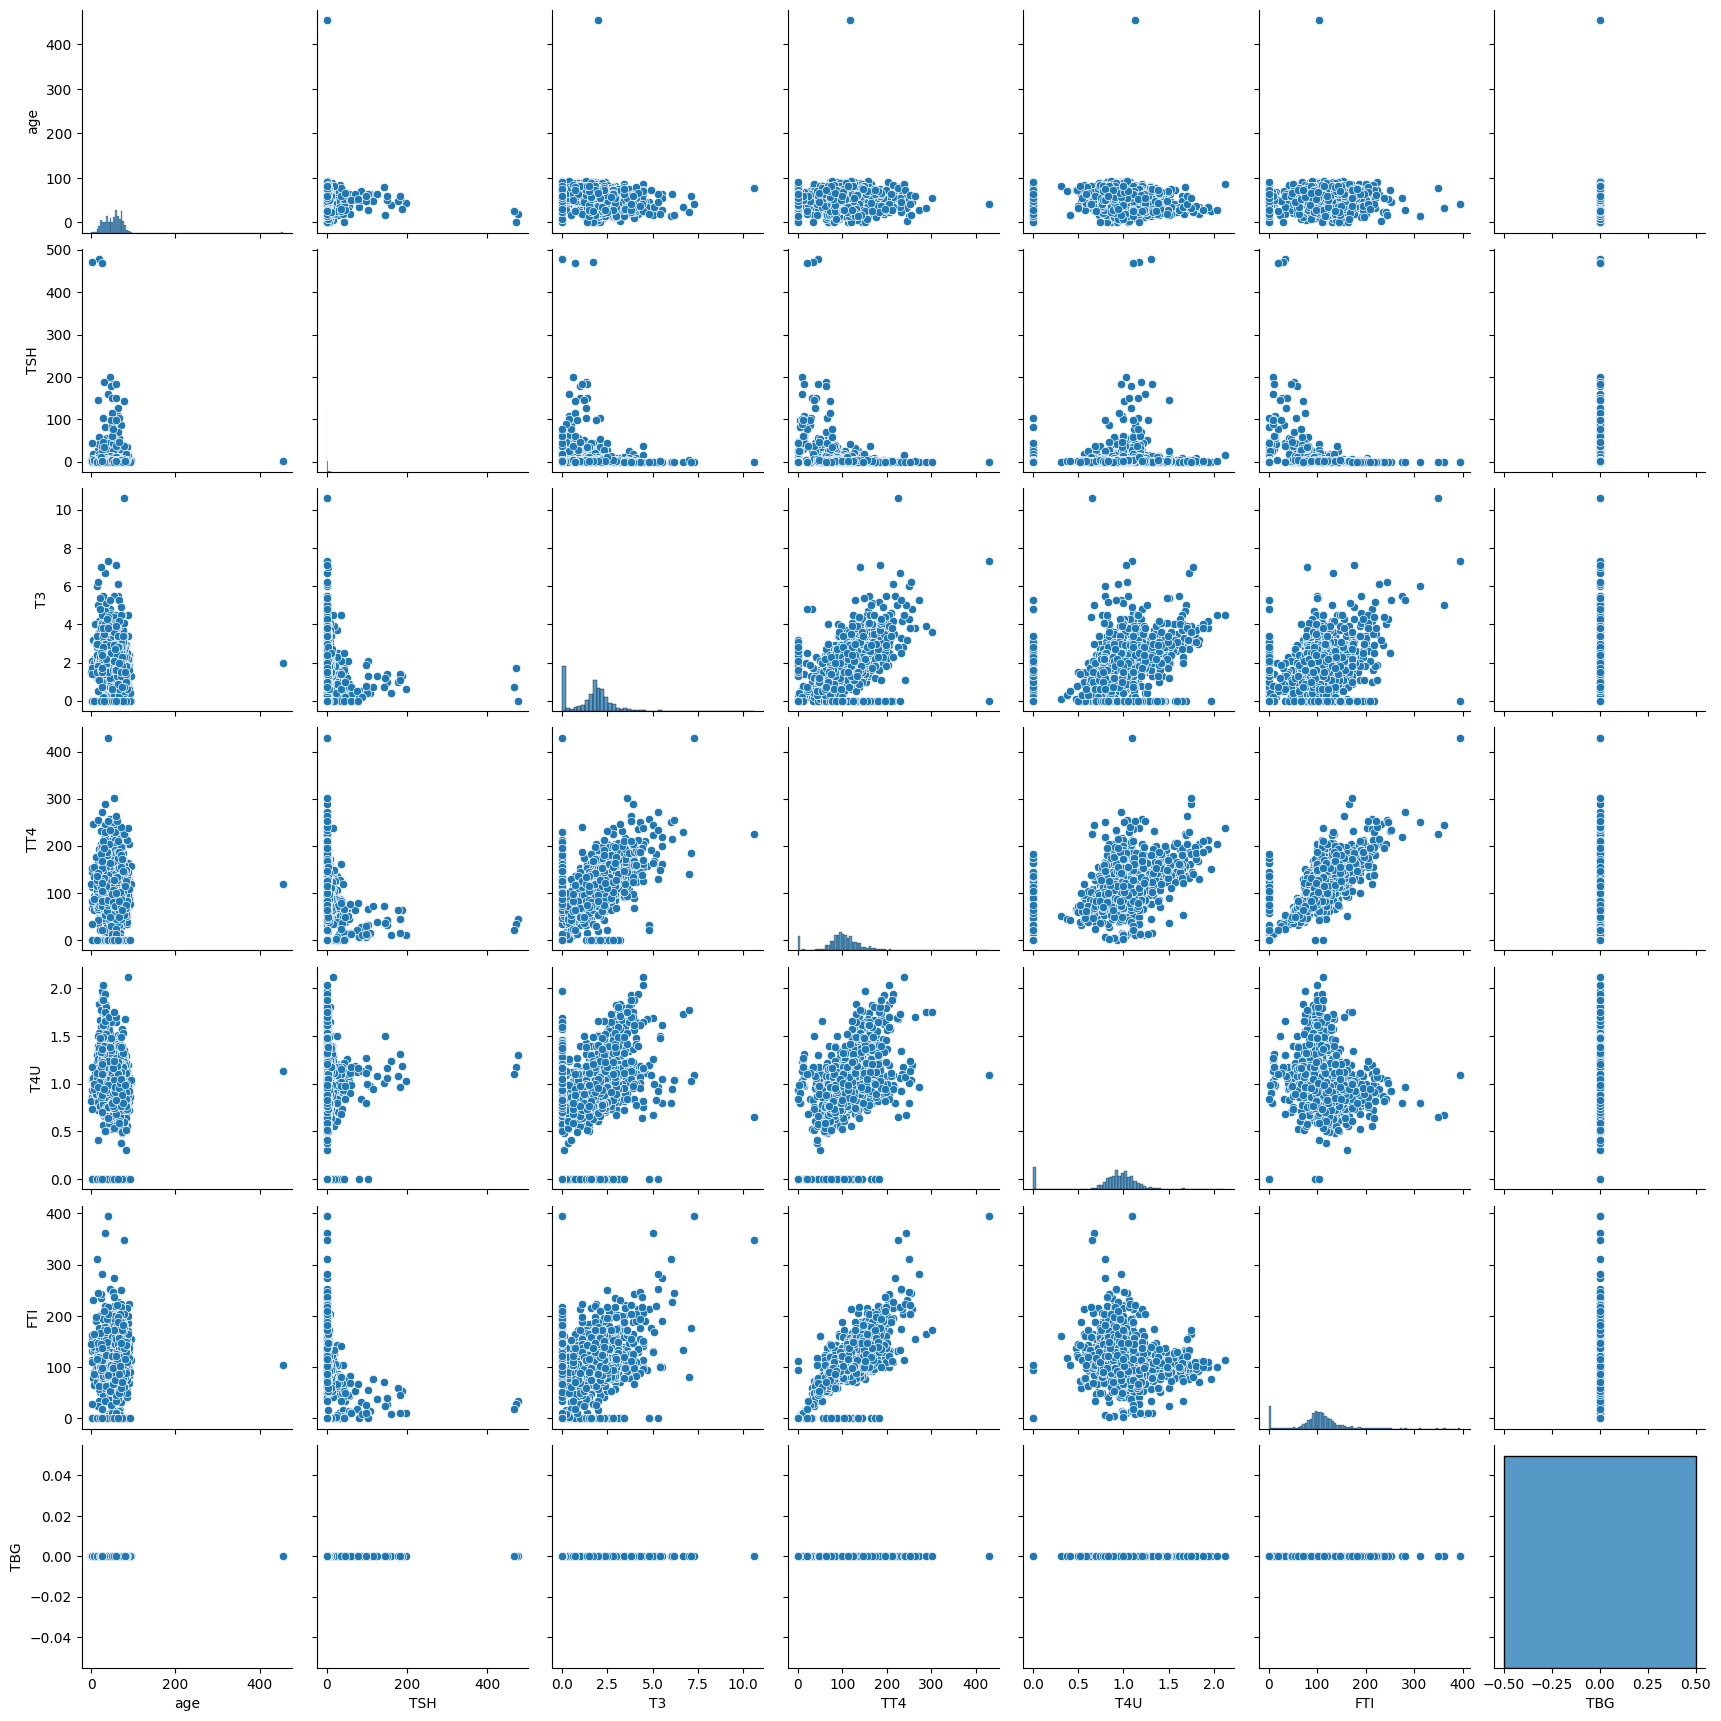

In [ ]:
sns.pairplot(data)

<ipython-input-47-576286b99232>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

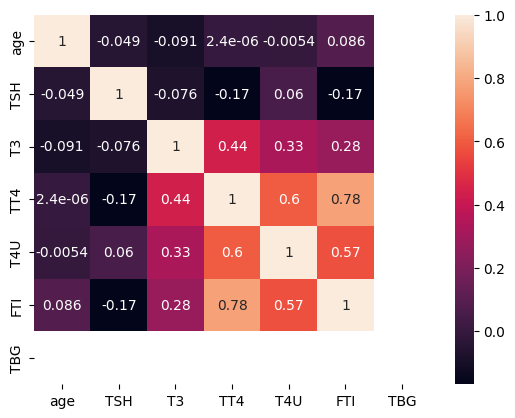

In [ ]:
#@title EDA
import seaborn as sns

correlation = data.corr()
# sns.heatmap(correlation, annot=True, cmap='coolwarm')

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

### First attempt

In [ ]:
# import numpy as np
# import pandas as pd

# #@title Node Class

# class Node():
#     def __init__(self, feature=None, threshold=None, left=None, right=None, ig=None, value=None):
#         '''Constructor for the Node class'''
#         # For decision nodes
#         self.left = left
#         self.right = right
#         self.feature = feature
#         self.threshold = threshold
#         self.ig = ig

#         # For leaf nodes
#         self.value = value

# #@title Decision Tree Class

# class DecisionTree():
#     def __init__(self, minSamplesSplit=2, maxDepth=2):
#         '''Constructor for the DecisionTree class'''
#         # Initialize the root of the tree to be None
#         self.root = None

#         # Stopping conditions
#         self.minSamplesSplit = minSamplesSplit
#         self.maxDepth = maxDepth

#     def buildTree(self, datapoint, currDepth=0):
#         '''Recursive method which builds out the decision tree and splits the data'''
#         X, Y = datapoint[:,:-1], datapoint[:,-1]
#         numSamples, numFeatures = np.shape(X)

#         # Split
#         if numSamples >= self.minSamplesSplit and currDepth <= self.maxDepth:
#             # Best split
#             bestSplit = self.getBestSplit(datapoint, numSamples, numFeatures)
#             # Checking if information gain is positive
#             if bestSplit["ig"] > 0:
#                 # Recur left
#                 leftSubtree = self.buildTree(bestSplit["leftData"], currDepth+1)
#                 # Recur right
#                 rightSubtree = self.buildTree(bestSplit["rightData"], currDepth+1)
#                 # Return decision node
#                 return Node(bestSplit["feature"], bestSplit["threshold"], leftSubtree, rightSubtree, bestSplit["ig"])

#         # Leaf node
#         leafValue = self.calculateLeafValue(Y)

#         return Node(value=leafValue)

#     def getBestSplit(self, datapoint, numSamples, numFeatures):
#         '''Method to find the best split'''
#         bestSplit = {}
#         maxIG = -float("inf")

#         for feature in range(numFeatures):
#             featureValues = datapoint[:, feature]
#             possibleThresholds = np.unique(featureValues)

#             for threshold in possibleThresholds:
#                 leftData, rightData = self.make_split(datapoint, feature, threshold)

#                 # Check if children are not null
#                 if len(leftData) > 0 and len(rightData) > 0:
#                     y, leftY, rightY = datapoint[:, -1], leftData[:, -1], rightData[:, -1]
#                     # Information gain
#                     currIG = self.cost_function(y, leftY, rightY, "gini")

#                     # Update the best split if needed
#                     if currIG > maxIG:
#                         bestSplit["feature"] = feature
#                         bestSplit["threshold"] = threshold
#                         bestSplit["leftData"] = leftData
#                         bestSplit["rightData"] = rightData
#                         bestSplit["ig"] = currIG
#                         maxIG = currIG

#         return bestSplit

#     def cost_function(self, parent, lChild, rChild, mode="entropy"):
#         '''Method to compute information gain'''
#         weight_l = len(lChild) / len(parent)
#         weight_r = len(rChild) / len(parent)

#         if mode == "giniIndex":
#             gain = self.giniIndex(parent) - (weight_l * self.giniIndex(lChild) + weight_r * self.giniIndex(rChild))
#         else:
#             gain = self.entropy(parent) - (weight_l * self.entropy(lChild) + weight_r * self.entropy(rChild))

#         return gain

#     def make_split(self, datapoint, feature, threshold):
#         '''Method to split the data'''
#         leftData = np.array([row for row in datapoint if row[feature] <= threshold])
#         rightData = np.array([row for row in datapoint if row[feature] > threshold])

#         return leftData, rightData

#     def max_depth(self, node):
#         '''Method to calculate the maximum depth of the tree'''
#         if node is None:
#             return 0

#         leftDepth = self.max_depth(node.left)
#         rightDepth = self.max_depth(node.right)

#         return max(leftDepth, rightDepth) + 1

#     def pruning(self, pruningFactor):
#         '''Method to prune the tree'''
#         self.max_depth = self.max_depth(self.root)
#         numNodes = 0.5 * pruningFactor * self.max_depth
#         self.prune(self.root, numNodes)

#     def prune(self, node, numNodes):
#         '''Method to prune the tree'''
#         if node.left:
#             if node.left.value is None:
#                 self.prune(node.left, numNodes)
#         if node.right:
#             if node.right.value is None:
#                 self.prune(node.right, numNodes)

#         if node.left.value is not None and node.right.value is not None:
#             leftValue, rightValue = node.left.value, node.right.value
#             node.left, node.right = None, None
#             node.value = max(leftValue, rightValue, key=lambda x: leftValue.count + rightValue.count)

#         if node.value is not None:
#             numNodes -= 1

#         return numNodes

#     def predict(self, X_test):
#       '''Method to predict the class labels'''
#       predictions = [self.prediction(x, self.root) for x in X_test]
#       return predictions

#     def prediction(self, x, tree):
#       if tree.value is not None: return tree.value

#       featureVal = x[tree.feature]

#       if featureVal <= tree.threshold:
#           return self.prediction(x, tree.left)
#       else:
#           return self.prediction(x, tree.right)



#     def score(self, X_test, y_test):
#         '''Method to calculate accuracy score'''
#         predictions = self.predict(X_test)
#         correct_predictions = 0

#         for i in range(len(predictions)):
#             if predictions[i] == y_test[i]:
#                 correct_predictions += 1

#         accuracy = correct_predictions / len(y_test)

#         return accuracy


#     def entropy(self, y):
#         '''Method to compute entropy'''
#         entropy = 0
#         classLabels = np.unique(y)

#         for labels in classLabels:
#             probLabels = len(y[y == labels]) / len(y)
#             entropy += -probLabels * np.log2(probLabels)

#         return entropy

#     def giniIndex(self, y):
#         '''Method to compute Gini index'''
#         gini = 0
#         classLabels = np.unique(y)

#         for labels in classLabels:
#             probLabels = len(y[y == labels]) / len(y)
#             gini += probLabels**2

#         return 1 - gini  # (since the Gini index ranges from 0 to 1 it can be achieved by subtracting from 1)

#     def calculateLeafValue(self, Y):
#         '''Method to calculate leaf value'''
#         Y = list(Y)
#         return max(Y, key=Y.count)

#     def printTree(self, tree=None, indent=" "):
#         '''Method to print the tree'''
#         if not tree:
#             tree = self.root

#         if tree.value is not None:
#             print(tree.value)

#         else:
#             print(f"{tree.feature} <= {tree.threshold}?")
#             print(f"{indent}T->", end="")
#             self.printTree(tree.left, indent + " ")
#             print(f"{indent}F->", end="")
#             self.printTree(tree.right, indent + " ")

#     def fit(self, X, Y):
#       '''Method to train the decision tree'''
#       self.root = self.buildTree(np.concatenate((X, Y.reshape(-1, 1)), axis = 1))


### Final Code

In [ ]:
import numpy as np
import pandas as pd

class Node():
    def __init__(self, feature=None, threshold=None, left=None, right=None, gini=None, value=None):
        '''Constructor for the Node class'''
        # For decision nodes
        self.left = left
        self.right = right
        self.feature = feature
        self.threshold = threshold
        self.gini = gini

        # For leaf nodes
        self.value = value

class MyDecisionTree():
    def __init__(self, min_samples_split=2, max_depth=None):
        '''Constructor for the MyDecisionTree class'''
        # Initialize the root of the tree to be None
        self.root = None

        # Stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def buildTree(self, X, Y, curr_depth=0):
        '''Recursive method which builds out the decision tree and splits the data'''
        num_samples, num_features = np.shape(X)

        # Stopping conditions
        if (curr_depth >= self.max_depth) or (num_samples < self.min_samples_split) or (len(np.unique(Y)) == 1):
            leaf_value = self.calculateLeafValue(Y)
            return Node(value=leaf_value)

        best_split = self.getBestSplit(X, Y)
        left_data, right_data = best_split["leftData"], best_split["rightData"]

        if len(left_data) == 0 or len(right_data) == 0:
            leaf_value = self.calculateLeafValue(Y)
            return Node(value=leaf_value)

        left_subtree = self.buildTree(left_data[:, :-1], left_data[:, -1], curr_depth + 1)
        right_subtree = self.buildTree(right_data[:, :-1], right_data[:, -1], curr_depth + 1)

        return Node(best_split["feature"], best_split["threshold"], left_subtree, right_subtree, best_split["gini"])

    def getBestSplit(self, X, Y):
        '''Method to find the best split'''
        num_samples, num_features = np.shape(X)
        best_split = {}
        min_gini = float('inf')

        for feature in range(num_features):
            feature_values = X[:, feature]
            unique_thresholds = np.unique(feature_values)

            for threshold in unique_thresholds:
                left_data, right_data = self.make_split(X, Y, feature, threshold)
                if len(left_data) > 0 and len(right_data) > 0:
                    gini = self.giniIndex(Y) - (len(left_data) / num_samples) * self.giniIndex(left_data[:, -1]) - \
                            (len(right_data) / num_samples) * self.giniIndex(right_data[:, -1])

                    if gini < min_gini:
                        best_split["feature"] = feature
                        best_split["threshold"] = threshold
                        best_split["leftData"] = left_data
                        best_split["rightData"] = right_data
                        best_split["gini"] = gini
                        min_gini = gini

        return best_split

    def cost_function(self, Y):
        '''Method to compute Gini impurity'''
        gini = 1.0
        class_labels = np.unique(Y)
        num_samples = len(Y)

        for label in class_labels:
            proportion = len(Y[Y == label]) / num_samples
            gini -= proportion ** 2

        return gini

    def make_split(self, X, Y, feature, threshold):
        '''Method to split the data'''
        left_data = np.array([row for row in np.hstack((X, Y.reshape(-1, 1))) if row[feature] <= threshold])
        right_data = np.array([row for row in np.hstack((X, Y.reshape(-1, 1))) if row[feature] > threshold])

        return left_data, right_data

    def max_depth(self, node):
        '''Method to calculate the maximum depth of the tree'''
        if node is None:
            return 0

        left_depth = self.max_depth(node.left)
        right_depth = self.max_depth(node.right)

        return max(left_depth, right_depth) + 1

    def predict(self, X_test):
        '''Method to predict the class labels'''
        predictions = [self.prediction(x, self.root) for x in X_test]
        return predictions

    def prediction(self, x, tree):
        if tree.value is not None:
            return tree.value

        feature_val = x[tree.feature]

        if feature_val <= tree.threshold:
            return self.prediction(x, tree.left)
        else:
            return self.prediction(x, tree.right)

    def score(self, X_test, y_test):
        '''Method to calculate accuracy score'''
        predictions = self.predict(X_test)
        correct_predictions = sum(1 for i in range(len(predictions)) if predictions[i] == y_test[i])
        accuracy = correct_predictions / len(y_test)
        return accuracy

    def giniIndex(self, Y):
        '''Method to compute Gini index'''
        gini = 1.0
        class_labels = np.unique(Y)
        num_samples = len(Y)

        for label in class_labels:
            proportion = len(Y[Y == label]) / num_samples
            gini -= proportion ** 2

        return gini

    def calculateLeafValue(self, Y):
        '''Method to calculate leaf value'''
        Y = list(Y)
        return max(Y, key=Y.count)

    def fit(self, X, Y):
        '''Method to train the decision tree'''
        self.root = self.buildTree(X, Y)


In [ ]:
from sklearn.model_selection import train_test_split

X = new_data.drop(['label'], axis=1)
Y = new_data['label']

# Spliting the data into a training set (70%) and a testing set (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create and train your decision tree model using MyDecisionTree
decision_tree = MyDecisionTree(max_depth=2)
decision_tree.fit(X_train.values, Y_train.values)  # Convert Pandas Series to NumPy arrays

# Make predictions on the test data
Y_pred = decision_tree.predict(X_test.values)

# Calculate accuracy using the score method
accuracy = decision_tree.score(X_test.values, Y_test.values)  # Convert Pandas Series to NumPy arrays

# Print the accuracy
print("Accuracy:", accuracy)
print(accuracy*100, "%")


Accuracy: 0.969047619047619
96.9047619047619 %


# Section B (Library Implementation)

In [ ]:
#@title Import libraries
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#@title Reading Data
data = pd.read_csv('/content/processed.cleveland.data')

In [ ]:
data.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
data.shape

(302, 14)

In [ ]:
data.isnull().sum()

63.0     0
1.0      0
1.0.1    0
145.0    0
233.0    0
1.0.2    0
2.0      0
150.0    0
0.0      0
2.3      0
3.0      0
0.0.1    0
6.0      0
0        0
dtype: int64

## EDA

In [ ]:
#@title Checing for NaN values in all columns
nan_check = data.isna()  # or df.isnull()
nan_counts = nan_check.sum()
print(nan_counts)

63.0     0
1.0      0
1.0.1    0
145.0    0
233.0    0
1.0.2    0
2.0      0
150.0    0
0.0      0
2.3      0
3.0      0
0.0.1    4
6.0      2
0        0
dtype: int64


In [ ]:
#@title replacing nan with mean values
import pandas as pd
import numpy as np

# Replace "?" with NaN in the specified columns
data['0.0.1'].replace('?', np.nan, inplace=True)
data['6.0'].replace('?', np.nan, inplace=True)

# Converting the columns to numeric
data['0.0.1'] = pd.to_numeric(data['0.0.1'], errors='coerce')
data['6.0'] = pd.to_numeric(data['6.0'], errors='coerce')

# Calculating the mean for each column
mean_0_0_1 = data['0.0.1'].mean()
mean_6_0 = data['6.0'].mean()

# Replacing NaN values with the respective means
data['0.0.1'].fillna(mean_0_0_1, inplace=True)
data['6.0'].fillna(mean_6_0, inplace=True)

nan_check = data.isna()  # or df.isnull()
nan_counts = nan_check.sum()
print(nan_counts)

63.0     0
1.0      0
1.0.1    0
145.0    0
233.0    0
1.0.2    0
2.0      0
150.0    0
0.0      0
2.3      0
3.0      0
0.0.1    0
6.0      0
0        0
dtype: int64


In [ ]:
data.dtypes

63.0     float64
1.0      float64
1.0.1    float64
145.0    float64
233.0    float64
1.0.2    float64
2.0      float64
150.0    float64
0.0      float64
2.3      float64
3.0      float64
0.0.1    float64
6.0      float64
0          int64
dtype: object

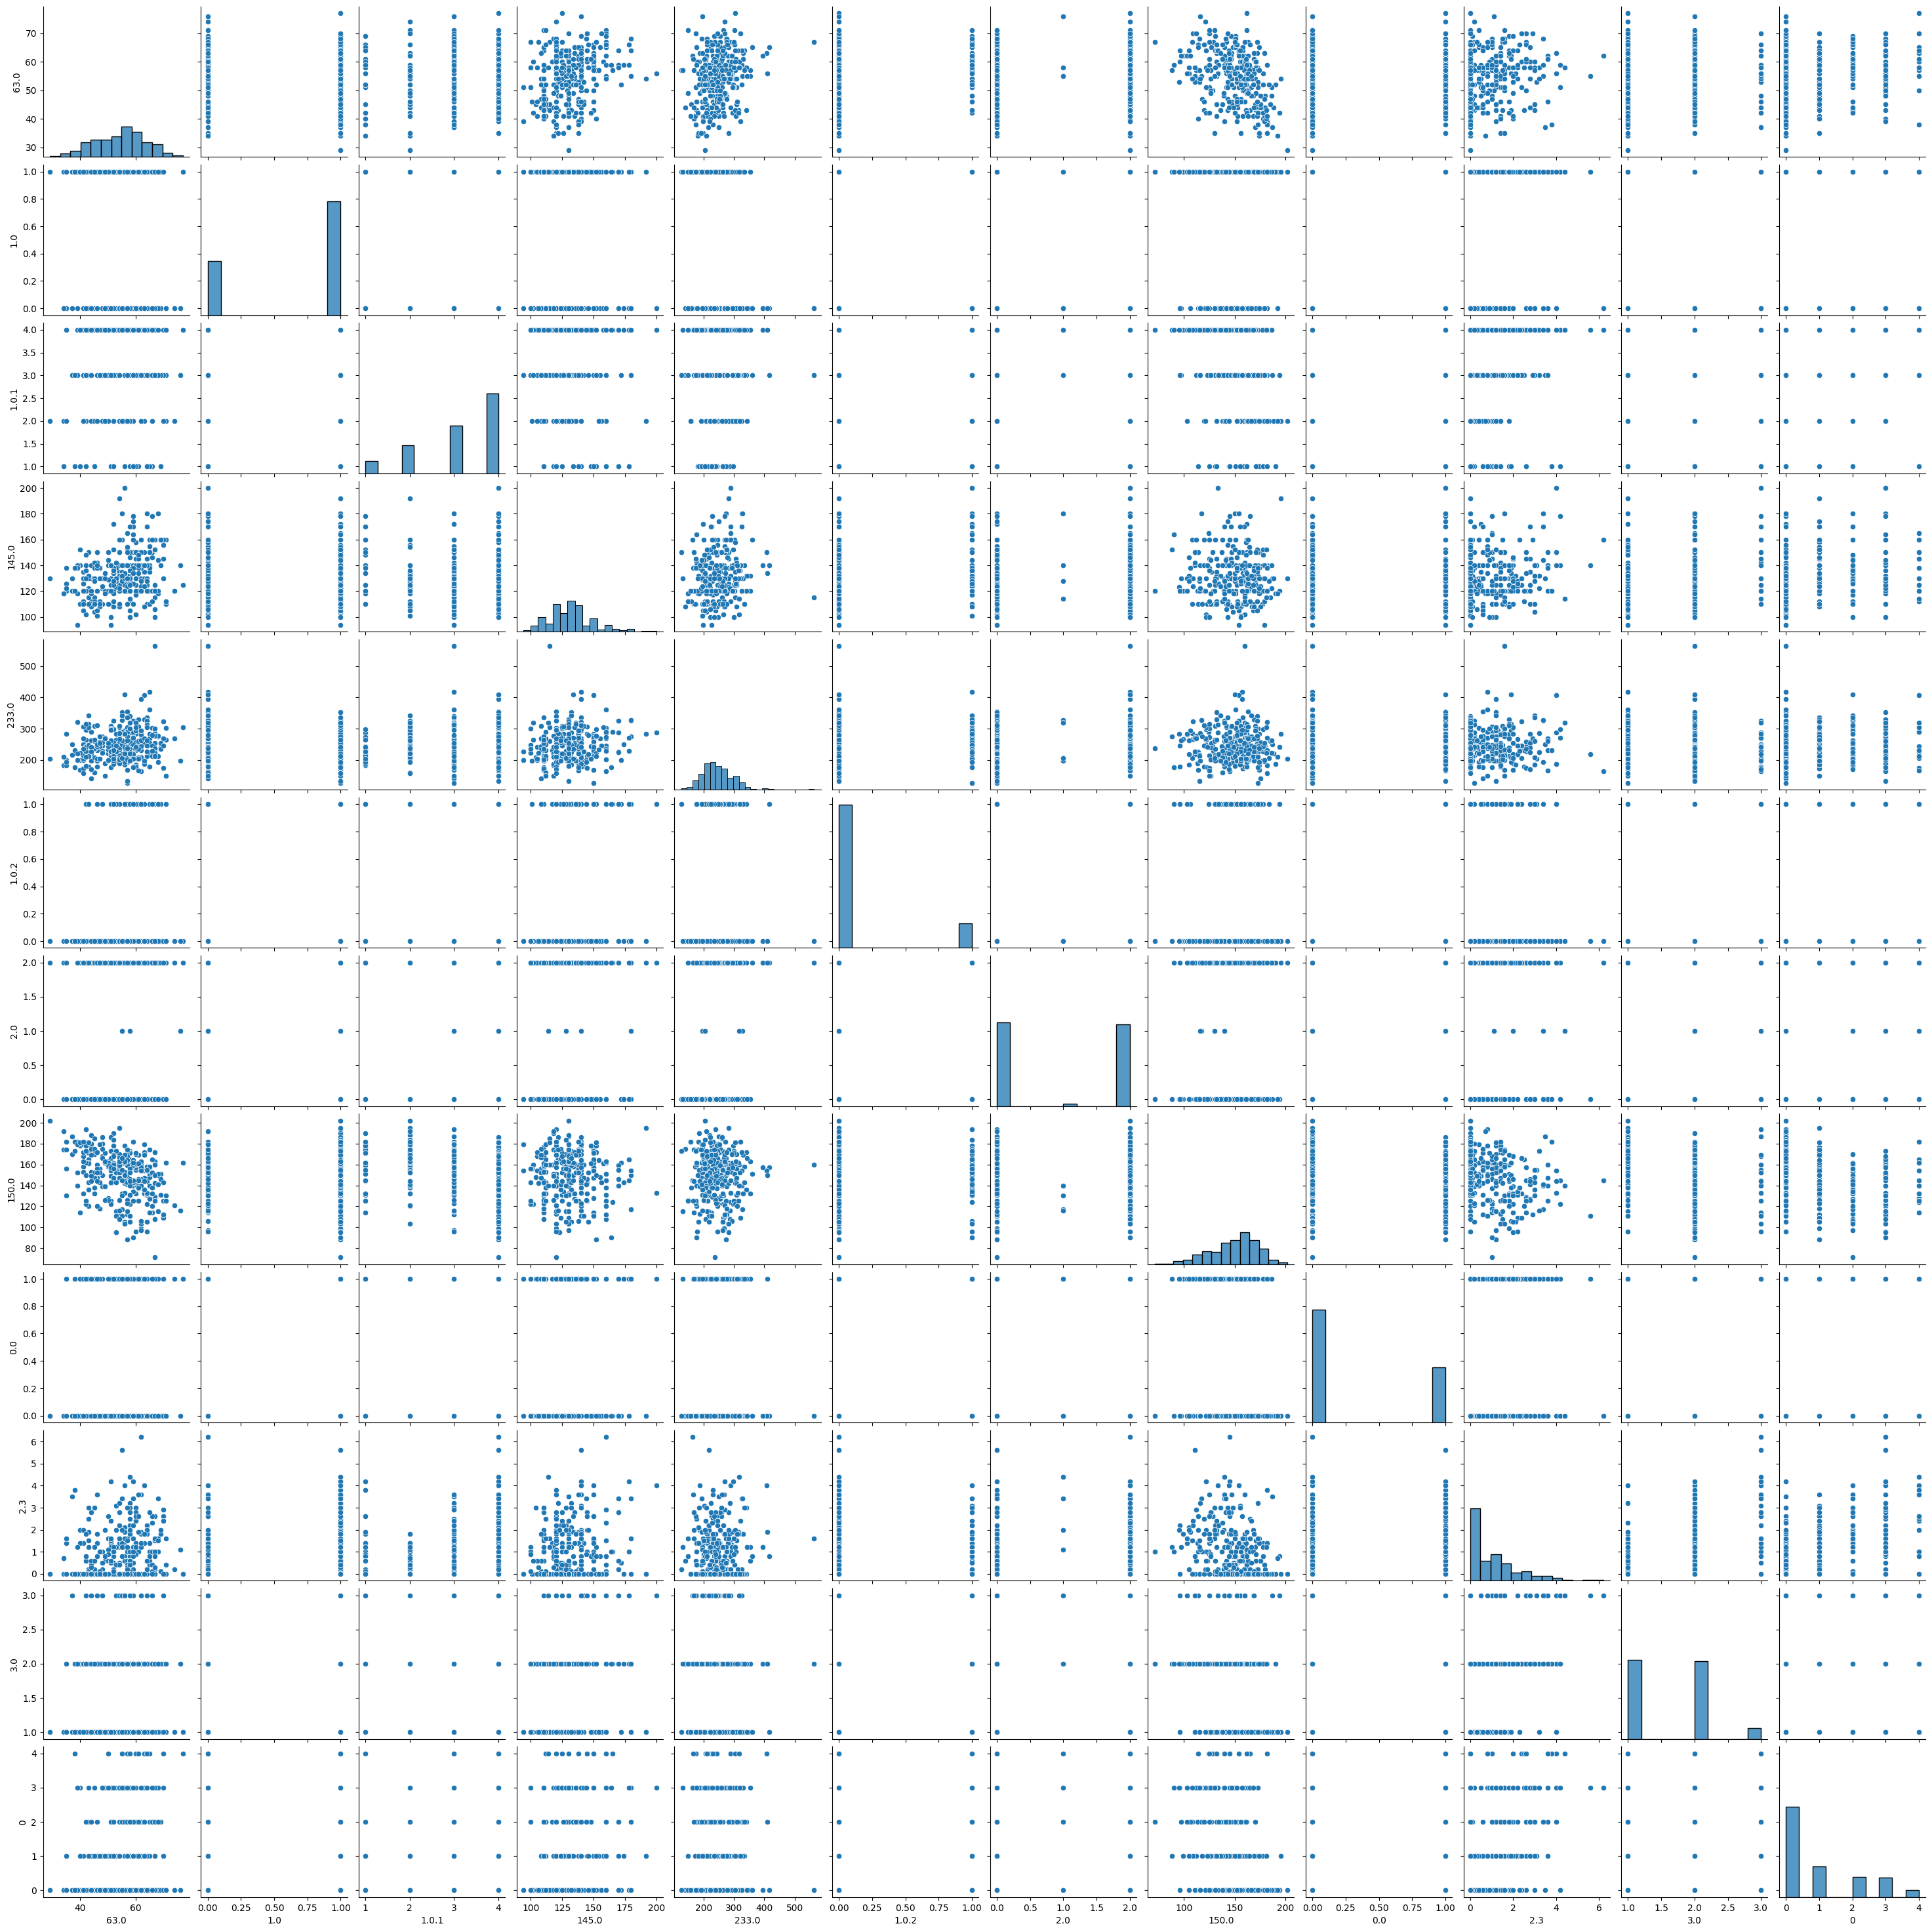

In [ ]:
import seaborn as sns

sns.pairplot(data)

In [ ]:
#@title b. and c.

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
y = data.iloc[:, 13]

# Spliting the dataset into train and test sets in an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracyScores = []

# Training decision trees using 'entropy' and 'gini' impurity as splitting criteria
for criterion in ['entropy', 'gini']:

    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score for this criterion
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy score to the list
    accuracyScores.append((criterion, accuracy))

# Determine the best criterion for attribute selection based on accuracy scores
bestCriterion, bestAccuracy = max(accuracyScores, key=lambda x: x[1])

print("------------------------------------------------------------------")
print("Accuracy Scores: ")
print("Entropy:", accuracyScores[0][1])
print("Gini:", accuracyScores[1][1])
print(f"The best criterion for attribute selection is '{bestCriterion}' with an accuracy of {bestAccuracy:.4f}")
print("------------------------------------------------------------------")

------------------------------------------------------------------
Accuracy Scores: 
Entropy: 0.45901639344262296
Gini: 0.4918032786885246
The best criterion for attribute selection is 'gini' with an accuracy of 0.4918
------------------------------------------------------------------


In [ ]:
#@title d.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings

# Creating a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_features='sqrt')  # Since 'gini' was found as the best criteria

# Defining the hyperparameter grid to search
param_grid = {
    'min_samples_split': [2, 5, 10, 20, 25],
    'max_features': ['auto', 'sqrt', 'log2', 'none']
}

# Creating GridSearch
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model with different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_max_features = grid_search.best_params_['max_features']

# Get the best accuracy score
best_accuracy = grid_search.best_score_

print(f'Best min_samples_split: {best_min_samples_split}')
print(f'Best max_features: {best_max_features}')
print(f'Best accuracy: {best_accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best min_samples_split: 25
Best max_features: sqrt
Best accuracy: 0.5853741496598639


In [ ]:
#@title e.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Defining the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20, 25]
}

# Creating GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Fitting the model with different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Training the Random Forest classifier with best hyperparameters
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

# Generating a classification report
class_report = classification_report(y_test, y_pred, zero_division=0)

print(f'Best n_estimators: {best_n_estimators}')
print(f'Best max_depth: {best_max_depth}')
print(f'Best min_samples_split: {best_min_samples_split}')
print(f'Classification Report:\n{class_report}')


Best n_estimators: 300
Best max_depth: None
Best min_samples_split: 10
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.91      0.78        32
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         3

    accuracy                           0.48        61
   macro avg       0.14      0.18      0.16        61
weighted avg       0.36      0.48      0.41        61

